## Mordred and Morgan 

In [2]:
# Computing mordred and morgan features and building a model from these features

In [22]:
%matplotlib inline

import Utils as model_helpers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

Computing Features

In [4]:
half_enantiomer_data = pd.read_csv("half_enantiomer_data.csv")

In [5]:
# Remove line separaters
half_enantiomer_data["SMILES String"] = half_enantiomer_data["SMILES String"].apply(lambda x : x.replace("\\n", "") and x.replace("\\r", ""))
half_enantiomer_data["SMILES String"] = half_enantiomer_data["SMILES String"].apply(lambda x : x.replace("\\n", ""))

In [6]:
# Calculate the mordred features
mordred_data = model_helpers.calculate_features(half_enantiomer_data, "mordred")

Convering SMILES string to Mol format...
Computing 3D coordinates...
Removing CC1=C2CC(CC1C3(CC4CC(=C3C)C4(C)C)C5[C@@H](O)C6CC(=C5C)C6(C)C)C2(C)C due to failed embedding
Computing Mordred features...


100%|██████████| 206/206 [00:12<00:00, 16.57it/s]


There are 206 molecules and 1826 features


In [7]:
# Calculate the morgan features
morgan_data = model_helpers.calculate_features(half_enantiomer_data, "morgan")

[11:40:49] WARNING: not removing hydrogen atom without neighbors
[11:40:52] Explicit valence for atom # 1 Si, 8, is greater than permitted
[11:40:52] Explicit valence for atom # 3 Si, 8, is greater than permitted
[11:40:53] Explicit valence for atom # 1 Si, 8, is greater than permitted
[11:40:53] Explicit valence for atom # 1 Si, 8, is greater than permitted
[11:41:00] WARNING: not removing hydrogen atom without neighbors
[11:41:00] WARNING: not removing hydrogen atom without neighbors
[11:41:00] WARNING: not removing hydrogen atom without neighbors
[11:41:00] WARNING: not removing hydrogen atom without neighbors
[11:41:03] WARNING: not removing hydrogen atom without neighbors
[11:41:04] WARNING: not removing hydrogen atom without neighbors
[11:41:04] WARNING: not removing hydrogen atom without neighbors
[11:41:04] WARNING: not removing hydrogen atom without neighbors
[11:41:04] WARNING: not removing hydrogen atom without neighbors
[11:41:05] WARNING: not removing hydrogen atom without

207 similarity features for 21685 molecules


[11:41:07] WARNING: not removing hydrogen atom without neighbors
[11:41:07] WARNING: not removing hydrogen atom without neighbors
[11:41:07] WARNING: not removing hydrogen atom without neighbors


In [8]:
#zero_var_cols = [mordred_data[col] for col in mordred_data.iloc[:,11:] if (mordred_data[col].var() > 0) == True]
#mordred_data.drop(columns)

In [9]:
# Dataframe with molecules that have mordred and morgan features computed
common_index = mordred_data.index.intersection(morgan_data.index)
mordred_data = mordred_data.loc[common_index]
morgan_data = morgan_data.loc[common_index]

In [10]:
# Reset index
mordred_data.set_index('Molecule Name').head().iloc[:, 10:];
morgan_data.set_index('Molecule Name').head().iloc[:, 10:];

In [11]:
# Data frame that has both the mordred and morgan features
both = mordred_data.join(morgan_data.iloc[:,10:], how="inner", rsuffix='morg_')
both.head()

,Unnamed: 0,Unnamed: 0.1,Molecule Name,Pubchem ID #,Note,Other SMILES,Method,Contributor,Detection Threshold,Detection Units,...,O.[OH-].[O].[O-][Si](=O)[O-].[Mg].[Al].[Fe],CCCCOC(=O)/C=C\C(=O)OCCCC.CC(=O)OC=C.C[C@]12CC[C@H](C1(C)C)C[C@@H]2OC(=O)C=C,C=CC(=O)N.C=CC(=O)O.[Na],C[Si](C)(Cl)Cl.O=[Si]=O,CCCC/C=C/CCO.CC(=O)O,CN(C)CCCNC(=O)NCCCN(C)C.C(CCl)OCCCl,C(=O)([O-])[O-].O.[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[Mg+2].[Al+3],CCC/C=C/CO.C1=CC=C(C=C1)C(=O)O,CC(=C)C(=O)NCCC[N+](C)(C)C.COC(=O)C=C.C=CC(=O)O.[Cl-],C(C(C(F)(F)F)(OC(C(C(F)(F)F)(OC(C(C(F)(F)F)(O)F)(F)F)F)(F)F)F)(F)F
\rCC(=O)C(/C)=C/[C@H]1C(=CCCC1(C)C)C\r,406,406,(+)-(6R)-alpha-Iso-methylionone (ee = 94%),5372174,NaN,\rCC(=O)C(/C)=C/[C@H]1C(=CCCC1(C)C)C\r,chem draw + cactus,LC,7.90E-02,ng/L air,...,0.032258,0.202247,0.140845,0.093750,0.157303,0.104478,0.090909,0.142857,0.189655,0.000000
\rCCCCCC[C@H](C)Oc1cnccn1,320,320,(+)-2-{[(1S)-1-methylheptyl]oxy}pyrazine,122379392,NaN,\rCCCCCC[C@H](C)Oc1cnccn1\r,chem draw + cactus,LC,3.00E+01,NaN,...,0.000000,0.134715,0.000000,0.050633,0.211538,0.134228,0.000000,0.176991,0.106870,0.026846
\rCC[C@H](C)Oc1cnccn1\r,314,314,(+)-2-{[(1S)-1-methylpropyl]oxy}pyrazine,520098,CAS No.24168-70-5 from https://www.sigmaaldric...,\rCC[C@H](C)Oc1cnccn1\r,chem draw + cactus,LC,1.00E+02,NaN,...,0.000000,0.059524,0.000000,0.074074,0.101266,0.064516,0.000000,0.159091,0.075472,0.032258
\rC[C@H]1OCC[C@@H]1SC(C)=O,366,366,"(2R,3S)-(+)-2-methyltetrahydrofuran-3-thiol ac...",7157263,https://pubchem.ncbi.nlm.nih.gov/compound/2S_3...,\rC[C@H]1OCC[C@@H]1SC(C)=O\r,chem draw + cactus,LC,1.86E+01,ng/L air,...,0.044444,0.136646,0.111111,0.127660,0.166667,0.085470,0.122449,0.098765,0.121212,0.000000
C(CC(=O)O)[C@@H](C(=O)O)N,24,24,L-(-)-glutamatic acid,33032,NaN,NaN,NaN,NaN,4.00E-01,ug/L in water,...,0.047619,0.101266,0.352941,0.090909,0.231884,0.087719,0.130435,0.205128,0.208333,0.035088


In [12]:
#Need to drop var columns
print(both.var().max())
print(both.var().min())

340658911179732.4
0.0


In [13]:
# Gets all Mordred or Mogan features that have numeric values and not Null values
# Joins the final mordred and morgan features 
finite_mordred = model_helpers.finite_features(mordred_data)
finite_morgan = model_helpers.finite_features(morgan_data)
both_features = finite_mordred | finite_morgan

Model

In [21]:
# Illustrate the magnitude differences across enantiomeric pairs in the dataset
model_helpers.fold_difference_of_enantiomers(half_enantiomer_data)

In [15]:
# Gets the appropriate parameter values for mordred model
# Gets the valid features (not null values) from feature data frame and the log_abs values from the feature dataframe
X_morded = mordred_data[finite_mordred]
y = mordred_data['log_abs']
X_morded = X_morded[y < 10]
y_mordred = y[y < 10]
Xn_mordred = pd.DataFrame(StandardScaler().fit_transform(X_morded), index=X_morded.index, columns=X_morded.columns)

In [16]:
# Gets the appropriate parameter values for Morgan model
# Gets the valid features (not null values) from feature data frame and the log_abs values from the feature dataframe
x_morgan = morgan_data[finite_morgan]
y_morgan = morgan_data["log_abs"]
x_morgan = x_morgan[y_morgan < 10]
y_morgan = y_morgan[y_morgan < 10]
Xn_morgan = pd.DataFrame(StandardScaler().fit_transform(x_morgan), index=x_morgan.index, columns=x_morgan.columns)

100%|██████████| 13/13 [23:58<00:00, 110.63s/it]


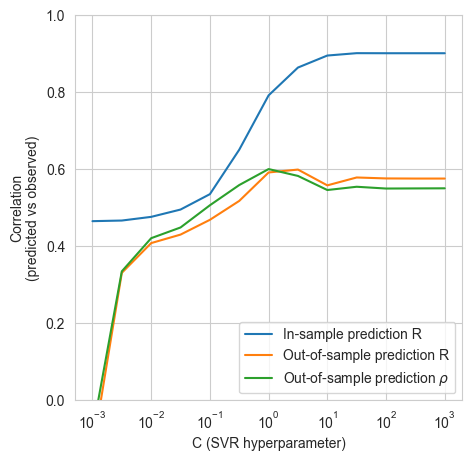

In [25]:
# Model for Morgan data
model_helpers.create_model(Xn_morgan, y_morgan)

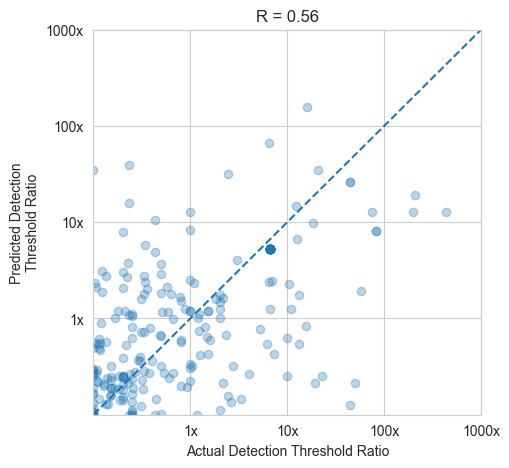

In [26]:
model_helpers.cross_val(Xn_morgan, y_morgan)

100%|██████████| 13/13 [01:02<00:00,  4.77s/it]


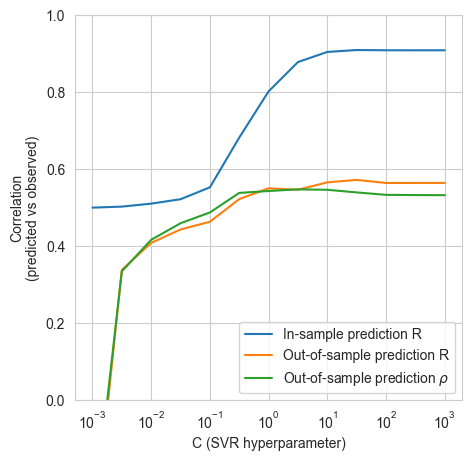

In [24]:
# Model for Mordred data
model_helpers.create_model(Xn_mordred, y_mordred)

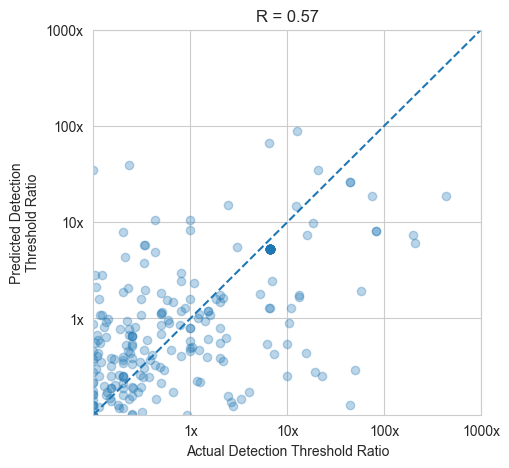

In [23]:
model_helpers.cross_val(Xn_mordred, y_mordred)